In [1]:
import sys
sys.path.insert(0, '../../../PyPlr')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

from pyplr.CIE import get_CIES026
from pyplr.oceanops import predict_dark_counts, calibrated_radiance
from pyplr.stlab import CalibrationContext

# Get calibrated spectrometer data for PLR-3000 settings

Text(0, 0.5, 'W/m$^2$')

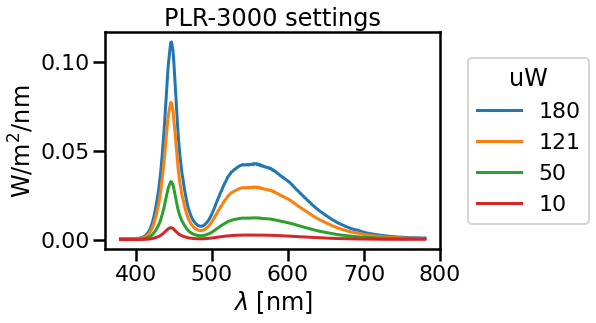

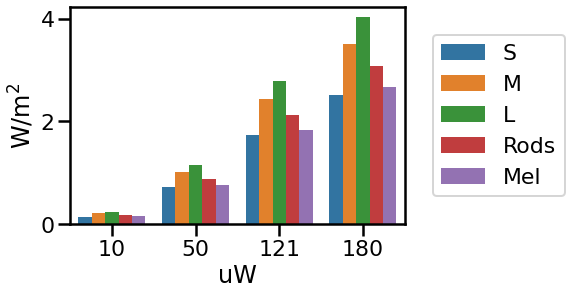

In [2]:
plr_spectra = pd.read_csv('../data/PLR-3000_spectra.csv', index_col='uW')
plr_spectra.reset_index(drop=True, inplace=True)
plr_info = pd.read_csv('../data/PLR-3000_spectra_info.csv', index_col='uW')
plr_info.reset_index(inplace=True)
darkcal = pd.read_table('../data/oo_dark_cal.txt', skiprows=2, index_col=False)
plr_dark_counts = predict_dark_counts(plr_info, darkcal)
cal_per_wl = pd.read_csv('../data/oo_calibration.csv', header=None)
sensor_area_cm2 = pd.read_csv('../data/oo_sensorArea.csv', header=None)

# Call function
w_m2_nm = calibrated_radiance(plr_spectra, plr_info, plr_dark_counts, cal_per_wl, sensor_area_cm2)
w_m2_nm = w_m2_nm.interpolate(axis=1)
w_m2_nm.index = plr_info.uW
w_m2_nm.columns = pd.Int64Index(range(380,781))

# plot SPDs and aopic irradiances
for i in w_m2_nm.index:
    w_m2_nm.loc[i].plot(label=i)
    plt.legend()
    plt.legend().set_title('uW')
    plt.ylabel('W/m$^2$/nm')
    plt.xlabel('$\lambda$ [nm]')
    plt.title('PLR-3000 settings')
    leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
    leg.set_title('uW')

_ , sss = get_CIES026(asdf=True)
sss = sss.fillna(0)
plr_3k_ao = w_m2_nm.dot(sss)

data = plr_3k_ao.reset_index().melt(id_vars=['uW'], var_name=['aopic'], value_name='irradiance')
f, ax = plt.subplots()
sns.barplot(data=data, x='uW', y='irradiance', hue='aopic', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set_ylabel('W/m$^2$')

# Create calibration context for STLAB 

380       381       382       383       384       385  \
led intensity                                                               
0   0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    65         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    130        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    195        0.000000  0.000000  0.000004  0.000000  0.000010  0.000016   
    260        0.000120  0.000078  0.000143  0.000142  0.000143  0.000136   
...                 ...       ...       ...       ...       ...       ...   
9   3835       0.004805  0.004619  0.004544  0.004574  0.004250  0.003880   
    3900       0.004468  0.004790  0.004257  0.004693  0.003956  0.003621   
    3965       0.004797  0.005050  0.004623  0.004957  0.004305  0.004161   
    4030       0.004834  0.005387  0.004674  0.005162  0.004448  0.004247   
    4095       0.005099  0.005310  0.005037  0.005156  0.004420  0.004231   

                    386       387       388       389  ...       771  \
led intensity                                          ...             
0   0          0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    65         0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    130        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    195        0.000002  0.000032  0.000013  0.000015  ...  0.000002   
    260        0.000148  0.000136  0.000151  0.000161  ...  0.000067   
...                 ...       ...       ...       ...  ...       ...   
9   3835       0.004228  0.003484  0.003731  0.004273  ...  0.002943   
    3900       0.004206  0.003458  0.003854  0.004562  ...  0.002951   
    3965       0.004243  0.003879  0.003819  0.004699  ...  0.003149   
    4030       0.004708  0.004041  0.004074  0.005171  ...  0.003273   
    4095       0.004623  0.004095  0.004487  0.004984  ...  0.003231   

                    772       773       774       775       776           777  \
led intensity                                                                   
0   0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
    65         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
    130        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
    195        0.000000  0.000000  0.000000  0.000000  0.000003  5.243781e-07   
    260        0.000062  0.000076  0.000079  0.000058  0.000078  6.537223e-05   
...                 ...       ...       ...       ...       ...           ...   
9   3835       0.003430  0.003303  0.003304  0.003584  0.003266  3.256202e-03   
    3900       0.003260  0.003288  0.003022  0.003308  0.003081  3.191800e-03   
    3965       0.003538  0.003434  0.003165  0.003345  0.003596  3.275223e-03   
    4030       0.003528  0.003760  0.003473  0.003938  0.003540  3.482008e-03   
    4095       0.003729  0.003792  0.003311  0.003832  0.003505  3.427454e-03   

                    778       779       780  
led intensity                                
0   0          0.000000  0.000000  0.000000  
    65         0.000000  0.000000  0.000000  
    130        0.000000  0.000000  0.000000  
    195        0.000000  0.000009  0.000000  
    260        0.000000  0.000086  0.000082  
...                 ...       ...       ...  
9   3835       0.002860  0.003361  0.003514  
    3900       0.002890  0.003207  0.003290  
    3965       0.002831  0.003219  0.003477  
    4030       0.003338  0.003347  0.003911  
    4095       0.003110  0.003654  0.003819  

[640 rows x 401 columns]

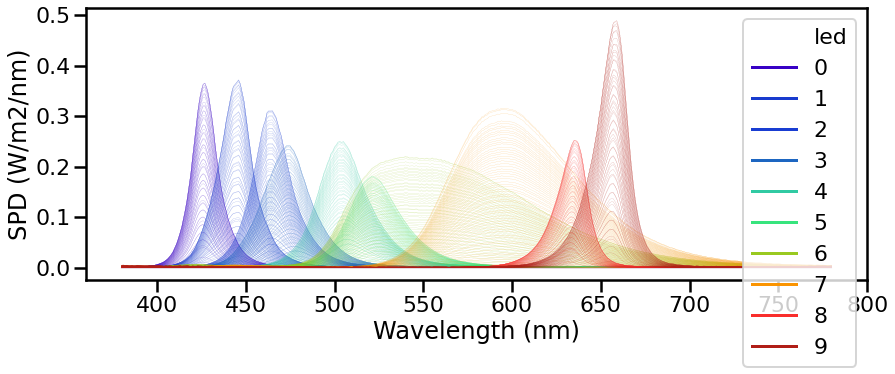

In [4]:
cc = CalibrationContext('../data/corrected_oo_spectra.csv')
_ = cc.plot_calibrated_spectra()
cc.data

In [6]:
leds = [0,1,2,3]
use = ['L','M','S','Mel']

settings_to_irradiances = cc.aopic.loc[[(led, 4095) for led in leds], use]
irradiances_2_settings = np.linalg.inv(settings_to_irradiances)
settings = np.array([.5]*4)
irradiances = settings.dot(settings_to_irradiances)
print(irradiances)
irradiances.dot(irradiances_2_settings)

[ 2.44702033  3.6474927  11.70569602 10.27341286]


array([0.5, 0.5, 0.5, 0.5])

In [7]:
plr_irradiances.T

NameError: name 'plr_irradiances' is not defined

# Search for STLAB settings that match PLR-3000 for $a$-opic irradiance

In [8]:
import itertools

num_leds = 5
use = ['L','M','S','Mel', 'Rods']
keep = []

# loop through all possible combinations in 10 choose 5
for choose in itertools.combinations(range(10), num_leds):
    
    # get the irradiances for each led at maximum
    settings_to_irradiances = cc.aopic.loc[[(led, 4095) for led in choose], use]
    
    # take the inverse
    irradiances_to_settings = np.linalg.inv(settings_to_irradiances)
    
    # calculate the required input fraction for the chosen leds
    plr_irradiances = plr_3k_ao.loc[180, use].T
    settings = plr_irradiances.dot(irradiances_to_settings)
    print(choose, '-->', settings)
    
    # keep the settings where all values are greater than 0 and less then 1
    if all(settings < 1) and all(settings > 0):
        keep.append((choose, settings))
        
print('\n' + str(len(keep)) + ' settings found')
keep

(0, 1, 2, 3, 4) --> [  372.17160118    31.85937956 -1064.41605148  1004.09815906
   -87.01510545]
(0, 1, 2, 3, 5) --> [ -96.36217267   30.28802407  122.31854185 -117.5930739     9.1021327 ]
(0, 1, 2, 3, 6) --> [-0.89385299  0.66074486  0.77041283 -0.75355046  0.21186487]
(0, 1, 2, 3, 7) --> [ 5.19712344 -2.00198008 -4.24146079  4.38200956  0.11650456]
(0, 1, 2, 3, 8) --> [10.154535   -5.01468641 -5.42198408  6.16853263  0.597303  ]
(0, 1, 2, 3, 9) --> [10.66330109 -5.37696608 -5.385175    6.2227906   0.68130313]
(0, 1, 2, 4, 5) --> [-47.24319494  30.45275793  -2.09338599  -9.12227307   8.14790596]
(0, 1, 2, 4, 6) --> [-0.61408669  0.68414109 -0.02838339 -0.06525368  0.21170599]
(0, 1, 2, 4, 7) --> [ 3.58858119 -2.15040301  0.40555346  0.38140929  0.11701523]
(0, 1, 2, 4, 8) --> [ 7.91678794 -5.24261719  1.12400802  0.53786911  0.60099513]
(0, 1, 2, 4, 9) --> [ 8.40892091 -5.60917342  1.21898379  0.54262967  0.68555176]
(0, 1, 2, 5, 6) --> [-0.27813501  0.46966525 -0.01350554 -0.0587037

[((0, 1, 2, 6, 8),
  array([0.30889447, 0.04290716, 0.09629732, 0.18880087, 0.06502348])),
 ((0, 1, 2, 6, 9),
  array([0.35449463, 0.00858066, 0.10551615, 0.18898025, 0.07359105])),
 ((0, 1, 3, 6, 7),
  array([0.04243686, 0.25143736, 0.03587514, 0.17929752, 0.01790879])),
 ((0, 2, 3, 6, 8),
  array([0.39242204, 0.04948182, 0.05233205, 0.18719914, 0.06953919])),
 ((0, 2, 3, 6, 9),
  array([0.3709194 , 0.09676796, 0.00991462, 0.18867916, 0.07455931])),
 ((0, 2, 4, 6, 7),
  array([0.40026259, 0.07635092, 0.04255219, 0.16060896, 0.02824261])),
 ((0, 2, 4, 6, 8),
  array([0.37065431, 0.10464014, 0.00436635, 0.18726821, 0.06937443])),
 ((0, 2, 4, 6, 9),
  array([0.36679711, 0.10721688, 0.00082882, 0.1886916 , 0.07452577])),
 ((0, 2, 5, 6, 7),
  array([0.37597228, 0.10064022, 0.07940931, 0.13687692, 0.04021948])),
 ((0, 2, 5, 6, 8),
  array([0.36791566, 0.10733714, 0.0059022 , 0.18634459, 0.07156108])),
 ((0, 2, 5, 6, 9),
  array([0.3662677 , 0.10773111, 0.00109246, 0.18852895, 0.07496056])),

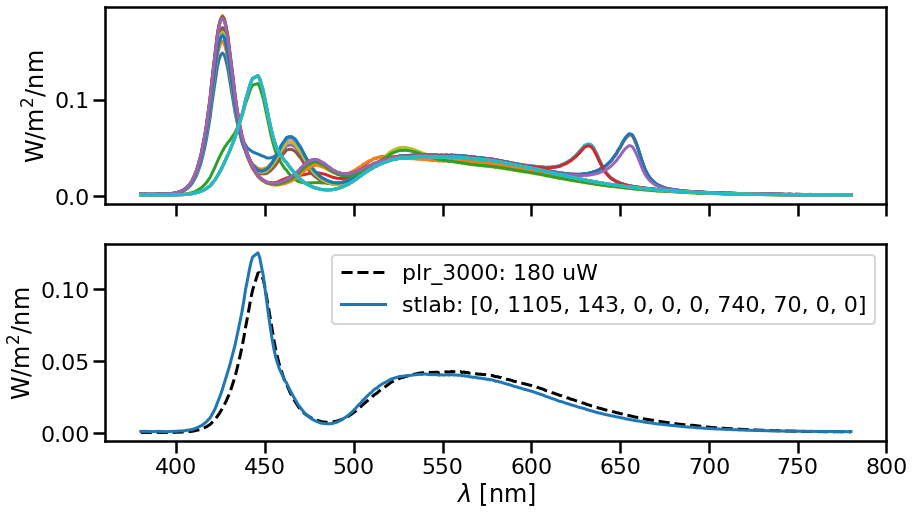

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14,8))
settings = pd.DataFrame()
predicted = pd.DataFrame()
for k in keep:
    leds = k[0]
    intensities = np.round(k[1] * 4095).astype('int')
    spec = [0]*10
    for led, i in zip(leds, intensities):
        spec[led] = i
    pred = cc.predict_spd(spec)
    ax1.plot(w_m2_nm.columns, pred)   
    predicted = predicted.append(pd.DataFrame(pred).T)
    settings = settings.append(pd.DataFrame(spec).T)

settings.reset_index(inplace=True, drop=True)
predicted.reset_index(inplace=True, drop=True)

best = predicted.sub(w_m2_nm.loc[180].to_numpy()).pow(2).sum(axis=1).idxmin()

w_m2_nm.loc[180].plot(label='plr_3000: 180 uW', ax=ax2, color='k', linestyle='--')
ax2.plot(w_m2_nm.columns, predicted.loc[best], label='stlab: ' + str(settings.loc[best].to_list()))
for ax in [ax1, ax2]:
    ax.set_ylabel('W/m$^2$/nm')
    ax.set_xlabel('$\lambda$ [nm]')
    
ax2.legend()

In [17]:
predicted.loc[16]

0      0.001216
1      0.001242
2      0.001212
3      0.001256
4      0.001141
         ...   
396    0.001150
397    0.001077
398    0.000926
399    0.001056
400    0.001133
Name: 16, Length: 401, dtype: float64

In [18]:
settings

,0,1,2,3,4,5,6,7,8,9
0,1265,176,394,0,0,0,773,0,266,0
1,1452,35,432,0,0,0,774,0,0,301
2,174,1030,0,147,0,0,734,73,0,0
3,1607,0,203,214,0,0,767,0,285,0
4,1519,0,396,41,0,0,773,0,0,305
5,1639,0,313,0,174,0,658,116,0,0
6,1518,0,429,0,18,0,767,0,284,0
7,1502,0,439,0,3,0,773,0,0,305
8,1540,0,412,0,0,325,561,165,0,0
9,1507,0,440,0,0,24,763,0,293,0
